In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE

In [ ]:
# Load dataset
df = pd.read_csv("creditcard_2023.csv")  # Update with the correct file path

# Exploratory Data Analysis (EDA)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
print(df.describe())

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [ ]:
print(df.isnull().sum())

# Drop rows where y is NaN
df = df.dropna(subset=['Class'])

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Splitting features and target
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target


In [ ]:
# Handling imbalance using SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# RF Model Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



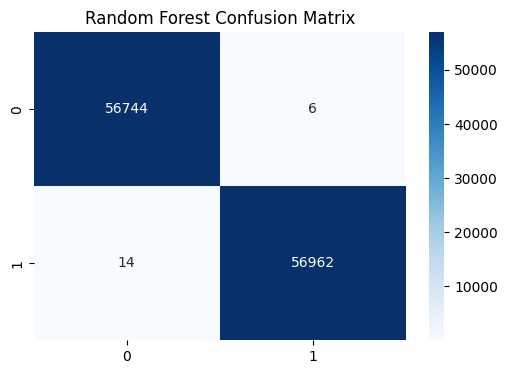

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
# Deep Neural Network (DNN)
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train DNN
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.5271 - loss: 188.1777 - val_accuracy: 0.5601 - val_loss: 0.6546
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6097 - loss: 0.6552 - val_accuracy: 0.7631 - val_loss: 0.4870
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7076 - loss: 0.5692 - val_accuracy: 0.7252 - val_loss: 0.5236
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7426 - loss: 0.5195 - val_accuracy: 0.7284 - val_loss: 0.5100
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7496 - loss: 0.5154 - val_accuracy: 0.7705 - val_loss: 0.4711
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7608 - loss: 0.4981 - val_accuracy: 0.7930 - val_loss: 0.4543
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7809 - loss: 0.4752 - val_accuracy: 0.7768 - val_loss: 0.4638
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy

In [ ]:
# DNN Evaluation
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
print("DNN Performance:")
print(classification_report(y_test, y_pred_dnn))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
DNN Performance:
              precision    recall  f1-score   support

           0       0.98      0.58      0.73     56750
           1       0.70      0.99      0.82     56976

    accuracy                           0.78    113726
   macro avg       0.84      0.78      0.77    113726
weighted avg       0.84      0.78      0.77    113726



In [ ]:
# Comparison of Models
rf_acc = accuracy_score(y_test, y_pred_rf)
dnn_acc = accuracy_score(y_test, y_pred_dnn)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"DNN Accuracy: {dnn_acc:.4f}")

Random Forest Accuracy: 0.9998
DNN Accuracy: 0.7833


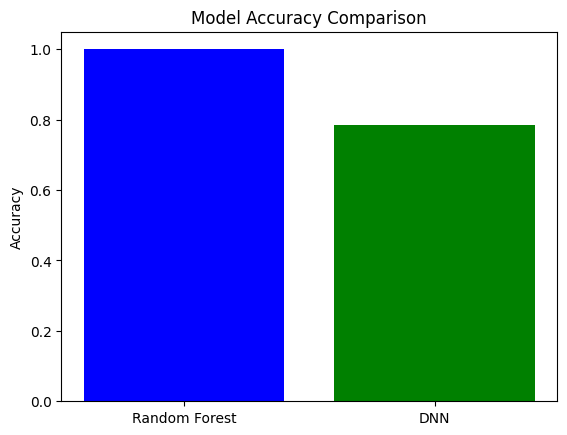

In [ ]:
# Bar Plot Comparison
plt.bar(["Random Forest", "DNN"], [rf_acc, dnn_acc], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


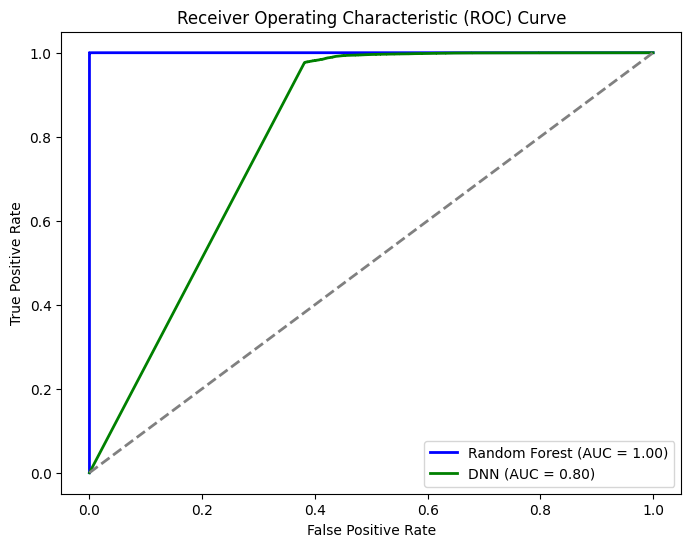

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for DNN
y_prob_dnn = dnn_model.predict(X_test)

# Get predicted probabilities for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC curve and AUC for DNN
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, y_prob_dnn)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# --- Plotting ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dnn, tpr_dnn, color='green', lw=2, label=f'DNN (AUC = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()